Реализовать serial test и применить к выборке samples

In [88]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
# setting the seed
rng.current = 1

samples = [rng() for _ in range(1000)]
import matplotlib.pyplot as plt
import numpy as  np
from scipy import stats

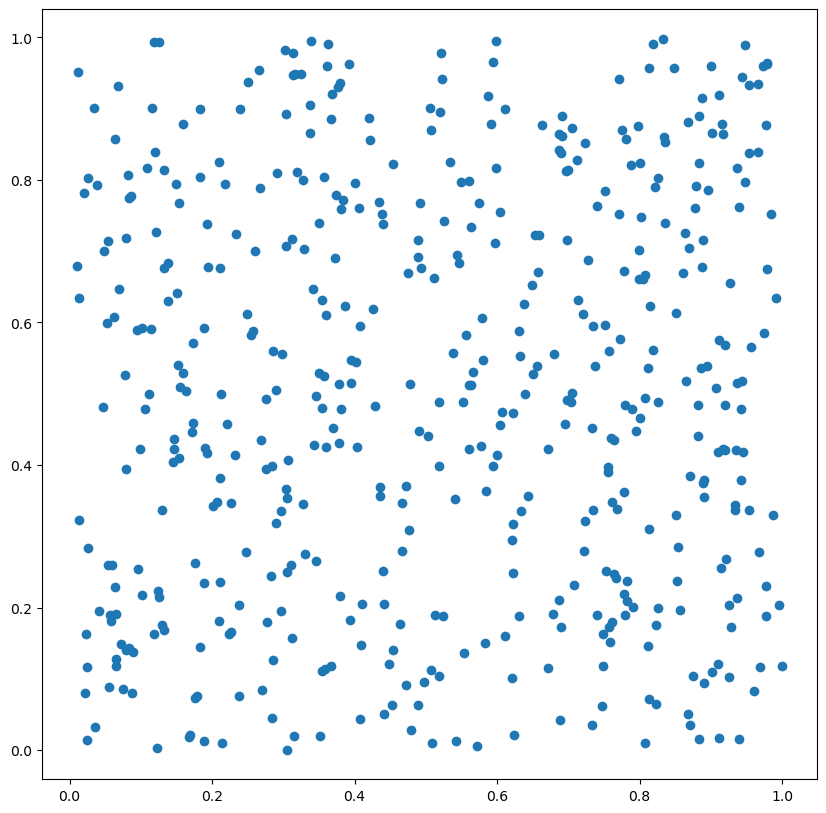

Power_divergenceResult(statistic=21.5, pvalue=0.6090827152142755)

In [98]:
fig = plt.figure(figsize=(10, 10))
fig.patch.set_facecolor('xkcd:white')

plt.scatter(samples[::2], samples[1::2])
plt.axis('equal')
plt.show()
k = 5
t = [(i, np.linspace(0, 1, k+1)[i], np.linspace(0, 1, k+1)[i+1]) for i in range(k)]
def uzn(n,t):
  for o in t:
    if  n<o[2]: return o[0]
t2D = [(uzn(samples[::2][i],t), uzn(samples[1::2][i],t)) for i in range(len(samples)//2)]
r = [a[0]*k+a[1] for a in t2D]
f_obs = np.histogram(r, np.linspace(0, k**2, k**2+1))[0]
f_exp = np.full( k**2, (len(r) // (k**2)))
stats.chisquare(f_obs, f_exp)

#когда k = 5 pvalue=0.6090827152142755 , что больше 0.05, значит, нужно принять
#f_obs = np.histogram(samples, np.linspace(0, 1, k+1))[0]
#f_exp = np.full(k, len(samples) // k)

#f_obs, f_exp, stats.chisquare(f_obs, f_exp)

Задача4:Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса.
    

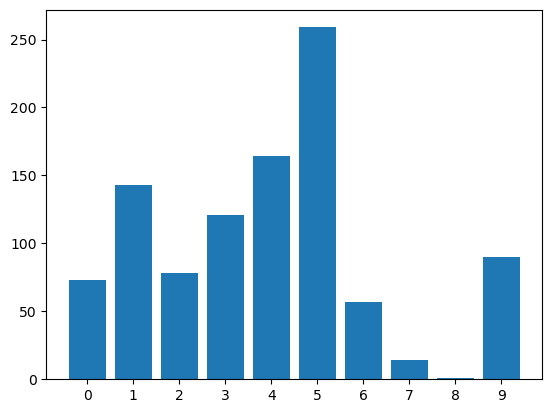

In [59]:
import matplotlib.pyplot as plt
import numpy as  np
w = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
sw = w.tolist()
w.sort()
isw = [np.where(sw == x)[0][0] for x in w]
#print(ids)
w /= w.sum()
F = [w[:(i+1)].sum() for i in range(len(w))]
r = [np.random.rand() for i in range(1000)]
br = np.zeros(len(w))
for i in range(1000):
    n = 0
    while n >= 0:
        if r[i] < F[n]:
            br[n] += 1
            n =- 1
        else:
            n += 1
plt.bar(isw, br)
plt.xticks(np.arange(min(isw), max(isw)+1, 1.0))
plt.show()

Задача5:Смоделируйте выборку размера 1000 из распределения  𝐸𝑥𝑝(𝜆)  с помощью метода Inverse transform. Постройте выборочную гистограмму и точный график плотности распределения.

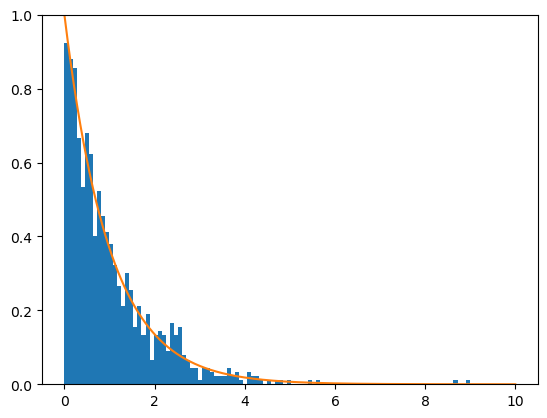

In [71]:
import matplotlib.pyplot as plt
import numpy as  np
r = [np.random.rand() for i in range(1000)]
import math 
new = np.array([-math.log((1-r[i])) for i in range (1000)])
xs = np.linspace(0, 10, 1000)#
xs1=np.array([math.exp(-xs[i]) for i in range (1000)])#
plt.hist(new,bins = 100,density=True)#
plt.ylim(0, 1)
plt.plot(xs, xs1)
plt.show()

Задача 6
Обоснуйте (устно), что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из распределения с плотностью  𝑒𝑥𝑐𝑜𝑠2𝑥  на отрезке  [−𝜋/2,𝜋/2] . По выборке постройте график выборочной гистограммы и сравните его с графиком точной функции плотности.

<Figure size 640x480 with 0 Axes>

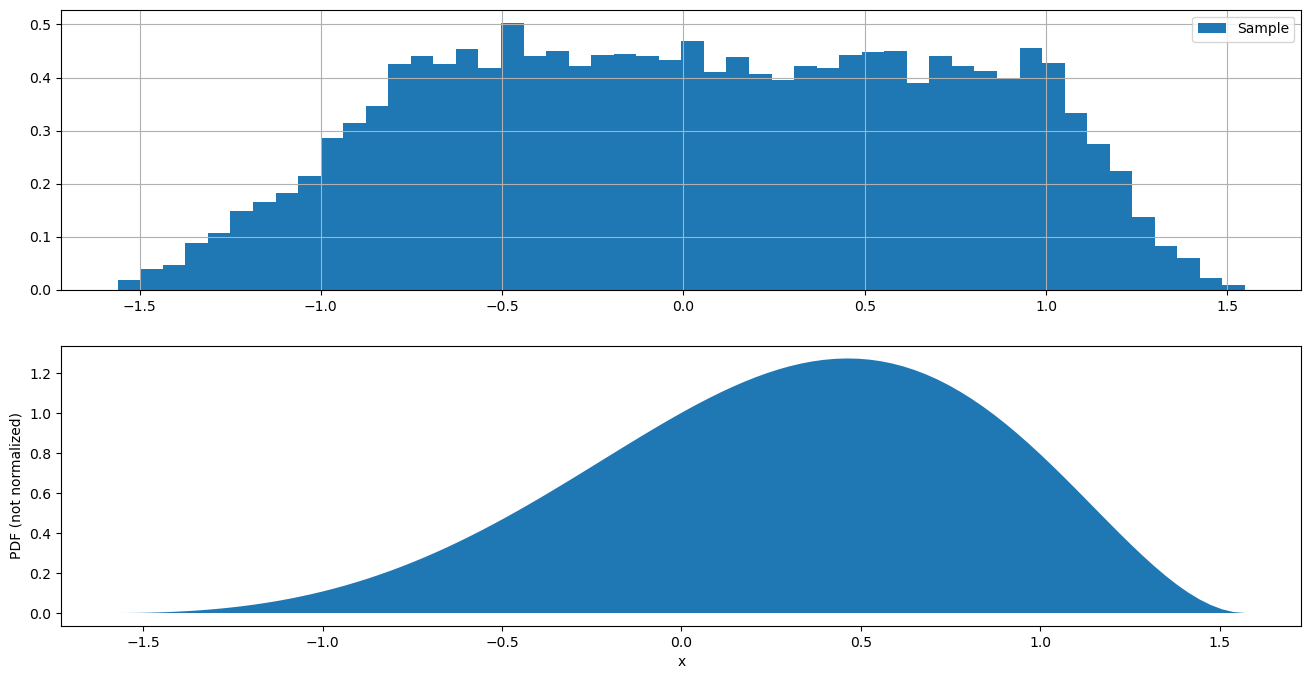

In [84]:
for _ in range(1000):
    x = np.pi * np.random.rand() - np.pi / 2.    
    while (np.exp(x) * np.cos(x)**2 < np.random.rand() * (x + np.pi/2.) / np.pi):
        x = np.pi * np.random.rand() - np.pi / 2.        
    m.append(x)    
r = np.array(m)
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
fig, axs = plt.subplots(2, 1, figsize=(16,8))
axs[0].hist(r,bins = 50, density = True,  label = 'Sample')
axs[0].legend()
axs[0].grid(True)
x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x) * np.cos(x)**2 # not norm
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.show()

Задача 7
Смоделировать и изобразить выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.



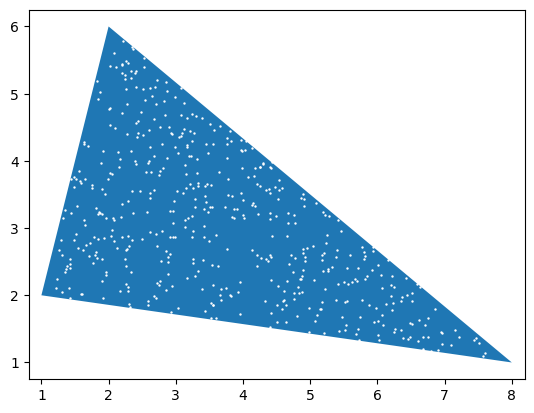

In [108]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

polygon = Polygon(np.array([[1, 2], [2, 6], [8, 1]]))#при True вылезло предупреждеие про 2 аргумента
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
n = 500#про выборку и распределение
x = np.array([np.random.rand() for i in range(n)])
y = np.array([np.random.rand() for i in range(n)])
x[(x + y) > 1] = 1 - x[(x + y) > 1] #отражение
y[(x + y) > 1] = 1 - y[(x + y) > 1] #отраж
fx = 7.0*x + y + 1
fy = 4.0*y - x + 2

plt.scatter(fx, fy,color = "white", s = 0.5)
plt.show()

Задача 8
Смоделировать без использования метода отбора выборку из 500 точек равномерно распределенных внутри единичного круга. Изобразите полученные точки. Они действительно равномерно заполняют круг?

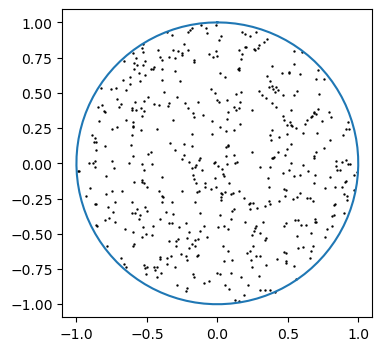

In [110]:
fig = plt.figure(figsize=(4, 4))
fig.patch.set_facecolor('xkcd:white')
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')

n = 500
phi = [np.random.rand()*2*np.pi for i in range(n)]
r = [np.sqrt(np.random.rand()) for i in range (n)]

x = r * np.cos(phi)
y = r * np.sin(phi)
plt.scatter(x,y, color = "black", s=0.5)
plt.axis('equal')
plt.show()

Задача 9
Докажите (устно), что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним [4, 7] и ковариационной матрицей [[20, -4], [ -4, 40]]. Постройте 2D гистограмму полученного распределения. Сравните выборочное среднее и ковариационную матрицу с точными значениями.

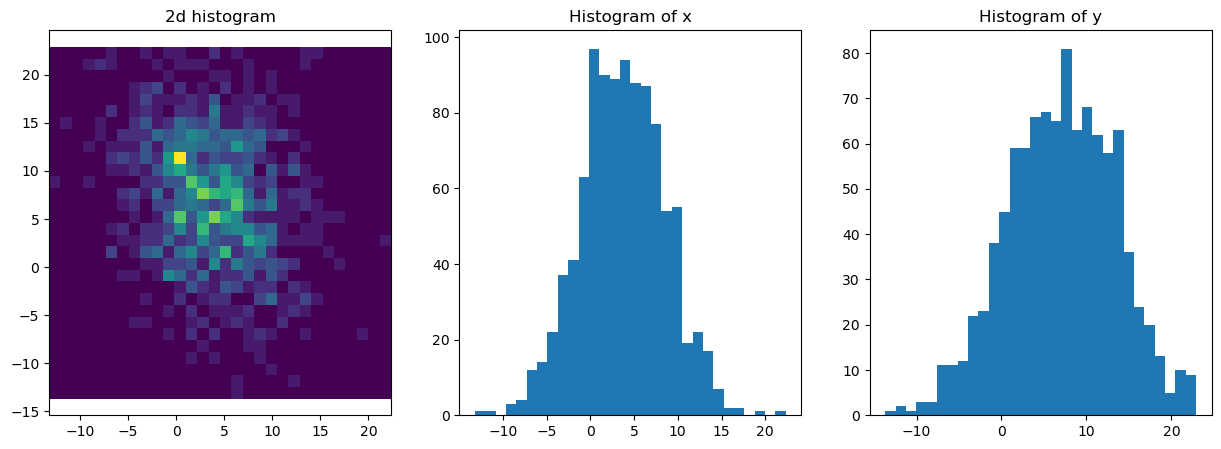

In [135]:
n = 1000#выб
u1 = np.random.rand(n) 
u2 = np.random.rand(n)
u1 = u1 * 2 - 1
u2 = u2 * 2 - 1
x = []
y = []   
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor('xkcd:white')


cov = np.array([[20, -4], [ -4, 40]])
mean = np.array([4, 7])
X = np.linalg.cholesky(cov)  
XT = X.T.conjugate()
R = u1**2 + u2**2
for i in range(n):
    e = np.random.rand()
    v = np.array([u1[i] * math.sqrt(-2*math.log(e)/R[i]), u2[i] * math.sqrt(-2*math.log(e)/R[i])])
    scal = np.dot(XT, v)
    #влияние на ков и M
    x.append(scal[0] + mean[0]) #не итерируемый=>только append
    y.append(scal[1] + mean[1]) 
    
    
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()